In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df=pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
min(df['quality'])

3

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
correlation=df.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

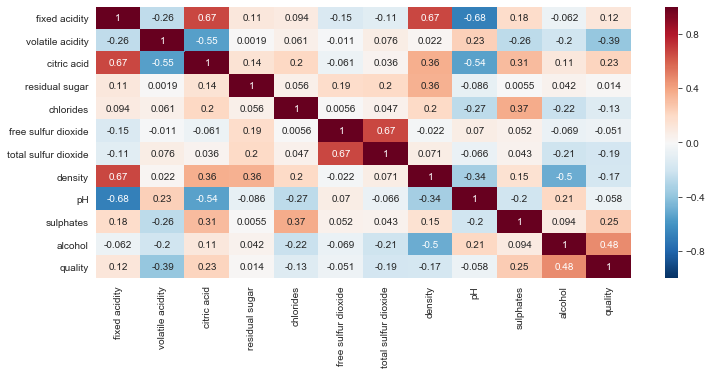

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r',vmin=-1)


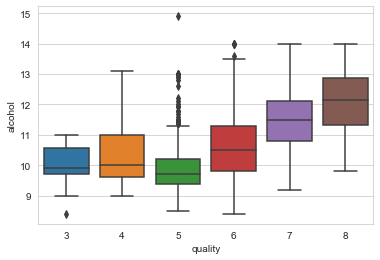

In [12]:
sns.boxplot(df['quality'],df['alcohol'])

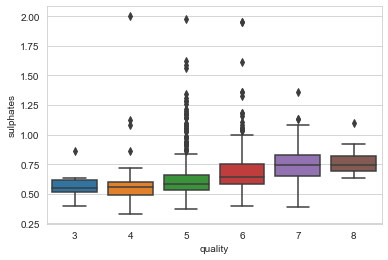

In [13]:
sns.boxplot(df['quality'],df['sulphates'])

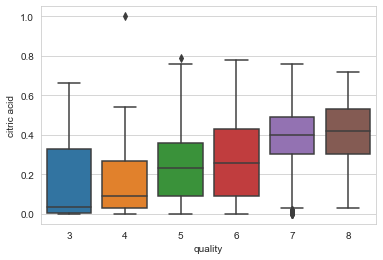

In [14]:
sns.boxplot(df['quality'],df['citric acid'])

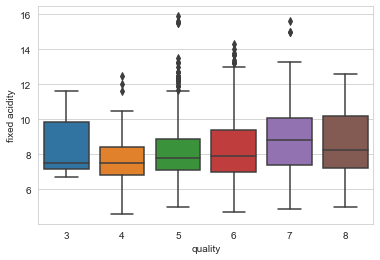

In [15]:
sns.boxplot(df['quality'],df['fixed acidity'])

In [16]:
df.loc[df['quality']<4,'rating']='bad'

In [17]:
df.loc[df['quality']>=7,'rating']='good'

In [18]:
df.loc[(df['quality']>=4) & (df['quality']<7),'rating']='average'

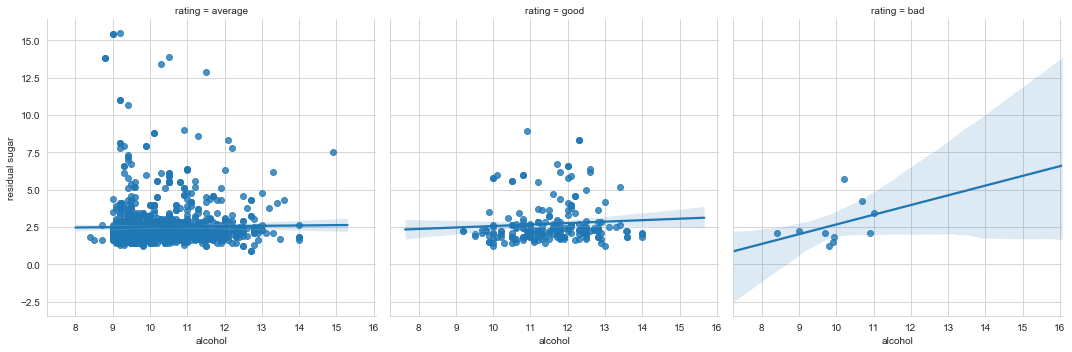

In [19]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = df)

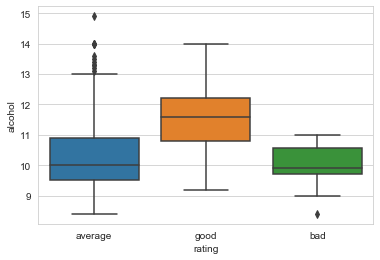

In [20]:
sns.boxplot(df['rating'],df['alcohol'])

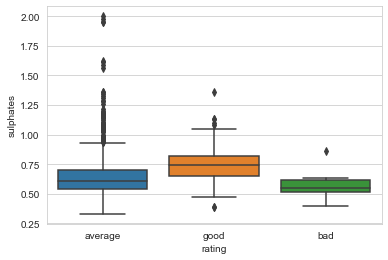

In [21]:
sns.boxplot(df['rating'],df['sulphates'])

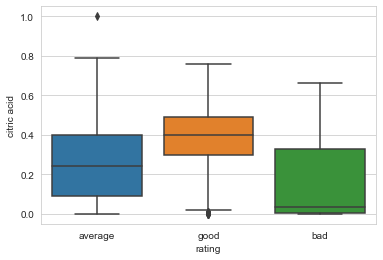

In [22]:
sns.boxplot(df['rating'],df['citric acid'])

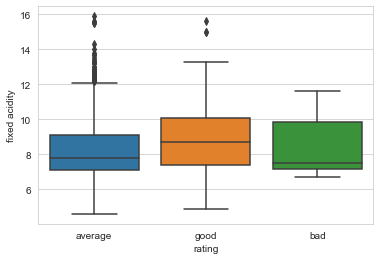

In [23]:
sns.boxplot(df['rating'],df['fixed acidity'])

In [24]:
df.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.235933,0.544563,0.255015,2.511224,0.089039,16.209913,48.456268,0.996855,3.314009,0.645299,10.253195,5.426385
bad,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,3.000000
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.metrics import classification_report

In [27]:
df.loc[df['rating']=='good','rating']=1
df.loc[df['rating']=='bad','rating']=0
df.loc[df['rating']=='average','rating']=2

In [28]:
x=df.drop(['quality','volatile acidity','chlorides','free sulfur dioxide','total sulfur dioxide','pH','density','rating'],axis=1)

In [29]:
y=df['rating']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model1=LogisticRegression()

In [33]:
model1.fit(x_train,y_train)

C:\Users\Aditya Rauthan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya Rauthan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
prediction1=model1.predict(x_test)


In [36]:
print(classification_report(prediction1,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.02      0.25      0.04         4
           2       0.99      0.86      0.92       316

    accuracy                           0.85       320
   macro avg       0.34      0.37      0.32       320
weighted avg       0.98      0.85      0.91       320



C:\Users\Aditya Rauthan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
